In [1]:
# Setting up dependencies to be utilized later here.

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import calendar
from datetime import datetime

In [2]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path_2020 = Path("Resources/2020_lottery_data.csv")
wa_lottery_df_2020 = pd.read_csv(wa_lottery_path_2020)

# displaying .csv just to see what data we have
wa_lottery_df_2020

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/1/2020,Wed,49-53-57-59-62,26,2,220000000
1,1/4/2020,Sat,1-11-21-25-54,7,2,237000000
2,1/8/2020,Wed,2-4-7-43-56,22,4,258000000
3,1/11/2020,Sat,3-21-23-31-59,3,2,277000000
4,1/15/2020,Wed,39-41-53-55-68,19,2,296000000
...,...,...,...,...,...,...
100,12/16/2020,Wed,4-23-37-61-67,7,2,287000000
101,12/19/2020,Sat,27-32-34-43-52,13,2,304000000
102,12/23/2020,Wed,6-13-38-39-53,6,3,321000000
103,12/26/2020,Sat,10-24-27-35-53,18,2,341000000


In [3]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['powerball'].apply(lambda x: x.mode())


In [4]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay_2020 = wa_lottery_df_2020[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped_2020 = weekday_powerplay_2020.groupby('weekday')['powerplay'].apply(lambda x: x.mode())


In [5]:
# Combine powerplay/powerball common 2020 DataFrames
combined_common_weekday_2020 = pd.merge(powerball_grouped_2020, powerplay_grouped_2020, left_index=True, right_index=True)

combined_common_weekday_2020

,,powerball,powerplay
weekday,,,
Sat,0,18,2
Wed,0,2,2


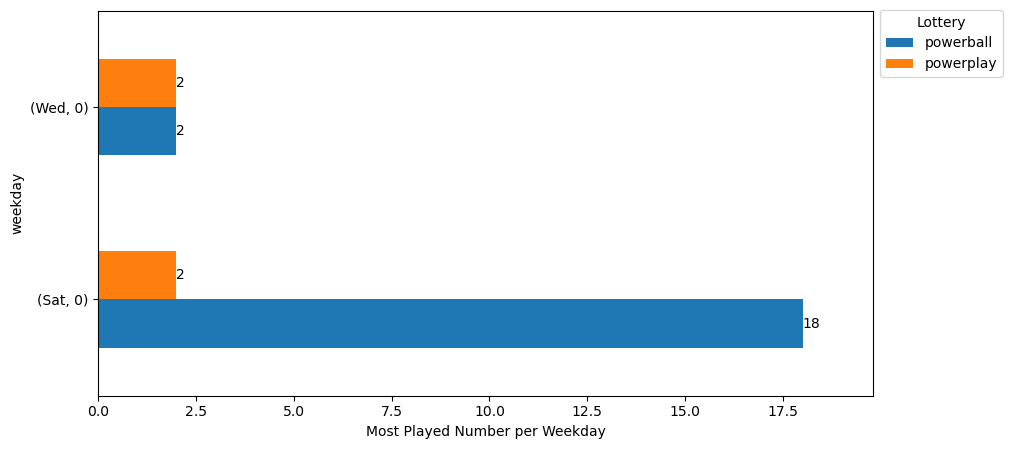

In [6]:
# generate a graph, bar, pie, not sure which one would represent the data better
# Plot bar chart
data = combined_common_weekday_2020.plot(kind = 'barh', ylabel = 'weekday', figsize = (10,5))
data.set(xlabel = 'Most Played Number per Weekday')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [7]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball_2020 = wa_lottery_df_2020[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball_2020['date'] = pd.to_datetime(date_powerball_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball_2020['month'] = date_powerball_2020['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball_2020.groupby('month')

# create an empty dictionary
powerball_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerball_common_2020[i] = month_data['powerball'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months_2020 = pd.DataFrame.from_dict(powerball_common_2020, orient='index', columns=['Common Powerball'])

In [8]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay_2020 = wa_lottery_df_2020[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay_2020['date'] = pd.to_datetime(date_powerplay_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay_2020['month'] = date_powerplay_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = date_powerplay_2020.groupby('month')

# create an empty dictionary
powerplay_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common_2020[i] = month_data['powerplay'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months_2020 = pd.DataFrame.from_dict(powerplay_common_2020, orient='index', columns=['Common Powerplay'])

In [9]:
# combine the two dataframes that hold the months together
combined_common_months_2020 = pd.merge(powerplay_common_months_2020, powerball_common_months_2020, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_abbr)))

# rename function for index change
combined_common_months_2020 = combined_common_months_2020.rename(index=month)

combined_common_months_2020

,Common Powerplay,Common Powerball
Jan,4,26
Feb,4,25
Mar,4,23
Apr,5,24
May,5,24
Jun,5,23
Jul,10,26
Aug,10,24
Sep,4,24
Oct,3,26


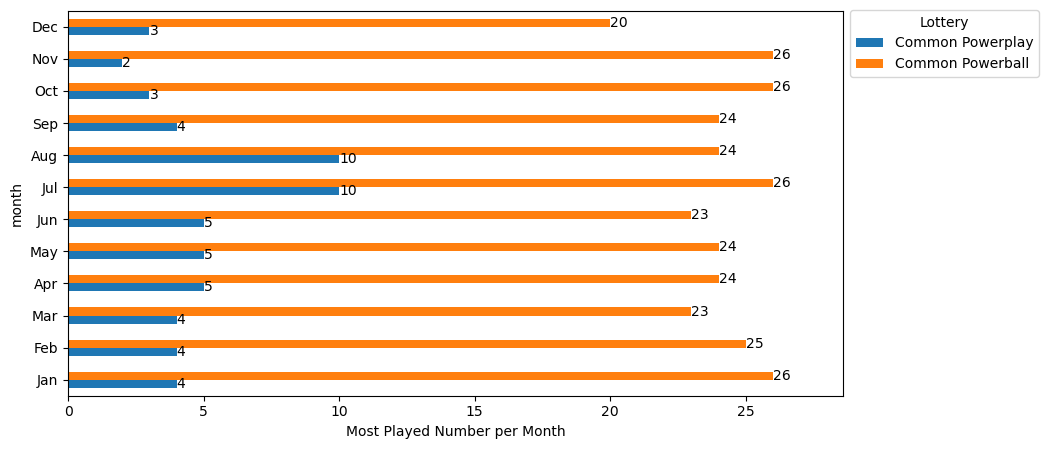

In [10]:
# Plot combined data for the Powerplay/Powerball for the month
data = combined_common_months_2020.plot(kind = 'barh', ylabel = 'month', figsize = (10,5))
data.set(xlabel = 'Most Played Number per Month')
for c in data.containers:
    data.bar_label(c, fmt = '%.0f', label_type = 'edge')
data.margins(x = 0.1)
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')

In [11]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common_2020 = wa_lottery_df_2020.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums_2020= year_tot_common_2020.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())

year_common_powernums_2020

,powerball,powerplay
weekday,,
Sat,18,2
Wed,2,2


In [37]:
# make a copy of the original DataFrame to manipulate
month_lottery_df_2020 = wa_lottery_df_2020.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df_2020['date'] = pd.to_datetime(month_lottery_df_2020['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df_2020['month'] = month_lottery_df_2020['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball_2020
month = month_lottery_df_2020.groupby('month')

# create an empty dictionary
jackpot_common_2020 = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    jackpot_common_2020[i] = month_data['jackpot'].max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months_2020 = pd.DataFrame.from_dict(jackpot_common_2020, orient='index', columns=['Common Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months_2020['Months'] = month

# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months_2020.sort_values(by=['Common Jackpot'], ascending = False)

# added additional column so that 2020 data will be unique when merged with 2021, 2022.
top_months_jackpot['Year'] = '2020'

top_months_jackpot

,Common Jackpot,Months,Year
1,394000000,January,2020
12,363000000,December,2020
11,216000000,November,2020
4,190000000,April,2020
8,169000000,August,2020
3,160000000,March,2020
6,135000000,June,2020
10,127000000,October,2020
7,126000000,July,2020
5,125000000,May,2020


In [64]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'jackpot'
weekday_powerball_2020 = wa_lottery_df_2020[['weekday', 'jackpot']]

# find the highest jackpot
powerball_grouped_2020 = weekday_powerball_2020.groupby('weekday')['jackpot'].apply(lambda x: x.max())

powerball_grouped_2020

weekday
Sat    373000000
Wed    394000000
Name: jackpot, dtype: int64

In [14]:
# +++++++++++++++++++++++++++++++++++++++++++2021 DATA BEGINS BELOW THIS!+++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
# 2021 Lottery data file
wa_lottery_to_load = Path("Resources/2021_lottery_data.csv")

# Read the lottery data file and convert into a single DataFrame
wa_lottery_df = pd.read_csv(wa_lottery_to_load)

# Display the data table for preview
wa_lottery_df.head(10)

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,1/2/2021,Sat,3-4-11-41-67,5,2,384000000
1,1/6/2021,Wed,1-20-22-60-66,3,3,410000000
2,1/9/2021,Sat,14-26-38-45-46,13,2,470000000
3,1/13/2021,Wed,4-19-23-25-49,14,2,550000000
4,1/16/2021,Sat,14-20-39-65-67,2,3,640000000
5,1/20/2021,Wed,40-53-60-68-69,22,3,730000000
6,1/23/2021,Sat,5-8-17-27-28,14,3,20000000
7,1/27/2021,Wed,17-33-35-42-52,9,3,20000000
8,1/30/2021,Sat,1-2-7-52-61,4,3,30000000
9,2/3/2021,Wed,5-37-40-64-66,5,3,20000000


In [16]:
# Create bar plot showing the most played powerball/powerplay number for each weekday using Pandas.
# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each weekday
weekday_powerball_total = wa_lottery_df.groupby(["weekday"])["powerball"].value_counts()
weekday_powerplay_total = wa_lottery_df.groupby(["weekday"])["powerplay"].value_counts()

# Take .max to find most played powerball/powerplay number 
max_powerball = weekday_powerball_total.groupby(["weekday"]).idxmax().values
max_powerplay = weekday_powerplay_total.groupby(["weekday"]).idxmax().values


# Assemble the resulting index into a single summary DataFrame.
weekday_combined_df = pd.DataFrame({"Powerball Weekday Max": max_powerball,
                                   "Powerplay Weekday Max": max_powerplay})

#Split both dataframes from ( , ) to two new columns
weekday_powerball_split_df = pd.DataFrame(weekday_combined_df["Powerball Weekday Max"].tolist(), columns = ["Weekday","Powerball Most Played Number"])
weekday_powerplay_split_df = pd.DataFrame(weekday_combined_df["Powerplay Weekday Max"].tolist(), columns = ["Weekday","Powerplay Most Played Number"])

# Merge both dataframes together 
most_played_per_day_df = weekday_powerball_split_df.merge(weekday_powerplay_split_df, how = "left")

#Convert Powerball Most Played Number and 	Powerpplay Most Played Number to int for ploting
most_played_per_day_df["Powerball Most Played Number"] = most_played_per_day_df["Powerball Most Played Number"].astype(int)
most_played_per_day_df["Powerplay Most Played Number"] = most_played_per_day_df["Powerplay Most Played Number"].astype(int)

# Display the data table for preview
most_played_per_day_df

,Weekday,Powerball Most Played Number,Powerplay Most Played Number
0,Mon,8,2
1,Sat,3,2
2,Wed,1,2


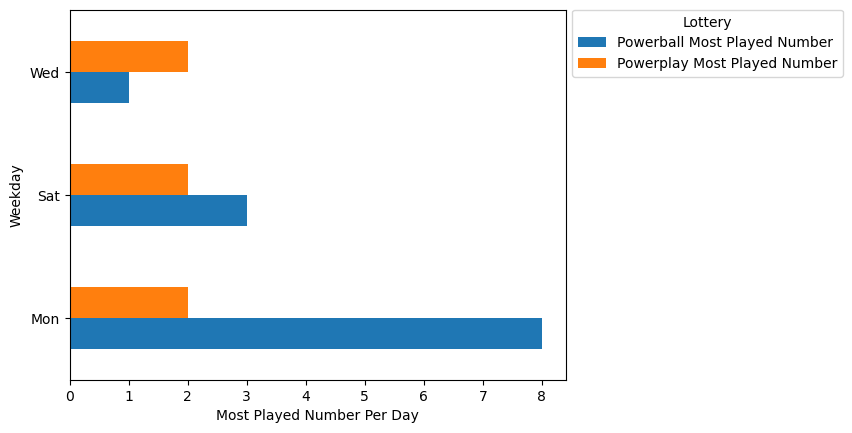

In [17]:
# Plot bar chart
data = most_played_per_day_df.plot(x="Weekday", y=["Powerball Most Played Number", "Powerplay Most Played Number"], kind = "barh")
data.set(xlabel = 'Most Played Number Per Day')
data.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [18]:
# Create bar plot showing the most played powerball/powerplay number for each month using Pandas.
# Take a copy of the orginal dataframe "date", "powerball", "powerplay", "jackpot" values
lottery_date_df = wa_lottery_df[["date", "powerball", "powerplay", "jackpot"]].copy()

# convert the date column from(mm/dd/yyyy) to (yyyy-mm-dd)
lottery_date_df["date"] = pd.to_datetime(lottery_date_df["date"])

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
lottery_date_df["month"] = lottery_date_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each month
powerball_by_month = lottery_date_df.groupby(["month"])["powerball"].value_counts()
powerplay_by_month = lottery_date_df.groupby(["month"])["powerplay"].value_counts()

# Take .max to find most played powerball/powerplay number for each month
max_month_powerball = powerball_by_month.groupby(["month"]).idxmax().values
max_month_powerplay = powerplay_by_month.groupby(["month"]).idxmax().values

# Assemble the resulting series into a single summary DataFrame
combined_df = pd.DataFrame({"Powerball Month Max": max_month_powerball, 
                            "Powerplay Month Max": max_month_powerplay})

# Split dataframes into two dataframe then convet data from ( , ) to two new columns
powerball_split_df = pd.DataFrame(combined_df["Powerball Month Max"].tolist(), columns = ["Months","Powerball Most Played Number"])
powerplay_split_df = pd.DataFrame(combined_df["Powerplay Month Max"].tolist(), columns = ["Months","Powerplay Most Played Number"])

# Data has already been converted to int
# Merge both dataframes together 
most_played_per_month_df = powerball_split_df.merge(powerplay_split_df, how = "left")

# Categorize Dataframe by Month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
most_played_per_month_df["Months"] = pd.Categorical(most_played_per_month_df["Months"], categories = ["January", "February", "March", "April", "May", "June", 
                                                                                                        "July", "August", "September", 
                                                                                                        "October", "November", "December"], ordered = True)
# Sort DataFrame by months and reset index                                                    
most_played_per_month_df = most_played_per_month_df.sort_values(["Months"]).reset_index(drop = True)

# Display the data table for preview
most_played_per_month_df 

,Months,Powerball Most Played Number,Powerplay Most Played Number
0,January,14,3
1,February,1,3
2,March,18,2
3,April,3,2
4,May,8,2
5,June,1,3
6,July,3,2
7,August,26,2
8,September,21,2
9,October,1,2


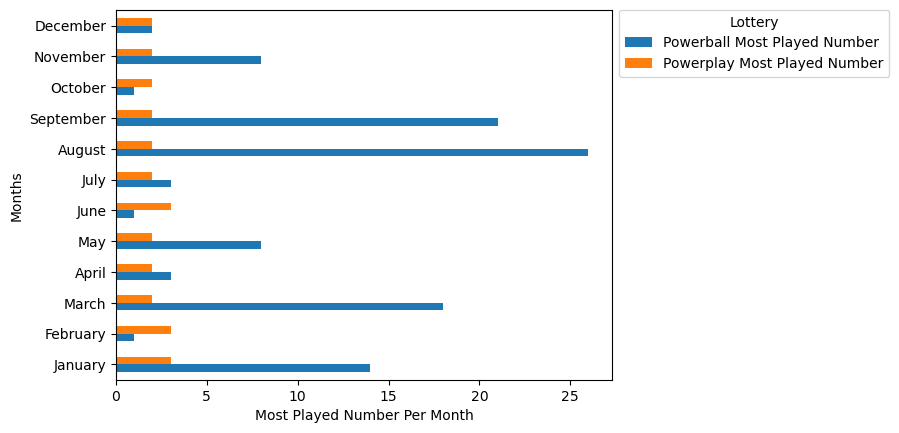

In [19]:
# Plot bar chart
data2 = most_played_per_month_df.plot(x="Months", y=["Powerball Most Played Number", "Powerplay Most Played Number"], kind = "barh")
data2.set(xlabel = 'Most Played Number Per Month')
data2.legend(title = 'Lottery', bbox_to_anchor = (1, 1.02), loc = 'upper left')


In [20]:
# Create bar plot showing the most played powerball/powerplay number overall.
# Need to use .value_counts to get the number of powerball/powerplay plays for entire data set
# Take .max to find most played powerball/powerplay number 
powerball_total = wa_lottery_df["powerball"].value_counts().idxmax()
powerplay_total = wa_lottery_df["powerplay"].value_counts().idxmax()

#Print results
print(f'Most played powerball number : {powerball_total}')
print(f'Most played powerplay number : {powerplay_total}')

Most played powerball number : 24
Most played powerplay number : 2


In [21]:
# Find the top 3 months with highest jackpot
# Take a copy of lottery_date_df dataframe "date" and "jackpot" values
jackpot_df = lottery_date_df[["date", "jackpot"]].copy()

# Create a new column called month that determines the month based on date 
# https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-and-pandas
jackpot_df["month"] = jackpot_df["date"].apply(lambda x:x.strftime("%B"))

# Need to use .groupby plus .value_counts to get the number of powerball/powerplay plays for each month
jackpot_by_month = lottery_date_df.groupby(["month"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number for each month
max_jackpot_powerball = jackpot_by_month.groupby(["month"]).idxmax().values

# Assemble the resulting series into a single summary DataFrame
combined_jackpot_df = pd.DataFrame({"Data": max_jackpot_powerball})

# Split dataframes into two dataframe then convet data from ( , ) to two new columns
jackpot_split_df = pd.DataFrame(combined_jackpot_df["Data"].tolist(), columns = ["Months","Highest Jackpot Per Month"])

# Convert Powerball Most Played Number and 	Powerpplay Most Played Number to int for ploting
jackpot_split_df["Highest Jackpot Per Month"] = jackpot_split_df["Highest Jackpot Per Month"].astype(int)

# Categorize Dataframe by Month ("Jan", "Feb"...."Dec")
# https://stackoverflow.com/questions/67472895/creating-using-categorical-data-type-with-pandas
jackpot_split_df["Months"] = pd.Categorical(jackpot_split_df["Months"], categories = ["January", "February", "March", "April", "May", "June", 
                                                                                                        "July", "August", "September", 
                                                                                                        "October", "November", "December"], ordered = True)
# Sort DataFrame by months and reset index 
jackpot_df = jackpot_split_df.sort_values(["Months"]).reset_index(drop = True)

# Sort the schools by `Highest Jackpot Per Month' in ascending order and display the top 5 rows.
top_5_jackpot = jackpot_df.sort_values(by = "Highest Jackpot Per Month", ascending=False)

# Display the data table for preview
top_5_jackpot.head(5).reset_index(drop = True)

,Months,Highest Jackpot Per Month
0,September,345000000
1,December,264000000
2,August,211000000
3,May,129000000
4,November,123000000


In [22]:
# Take a copy of the orginal dataframe "weekday" amd "jackpot" values
jackpot_weekday_df = wa_lottery_df[["weekday", "jackpot"]]

# Need to use .groupby plus .value_counts to get the jackpot for each weekday
jackpot_weekday_total = jackpot_weekday_df.groupby(["weekday"])["jackpot"].value_counts()

# Take .max to find most played powerball/powerplay number 
max_jackpot_weekday = jackpot_weekday_total.groupby(["weekday"]).idxmax().values

# Assemble the resulting index into a single summary DataFrame.
jackpot_weekday_combined_df = pd.DataFrame({"Jackpot Weekday Max": max_jackpot_weekday})

#Split both dataframes from ( , ) to two new columns
weekday_jackpot_max_df = pd.DataFrame(jackpot_weekday_combined_df["Jackpot Weekday Max"].tolist(), columns = ["Weekday","Jackpot Weekday Max Value"])

# Display the data table for preview
weekday_jackpot_max_df 

,Weekday,Jackpot Weekday Max Value
0,Mon,416000000
1,Sat,30000000
2,Wed,20000000


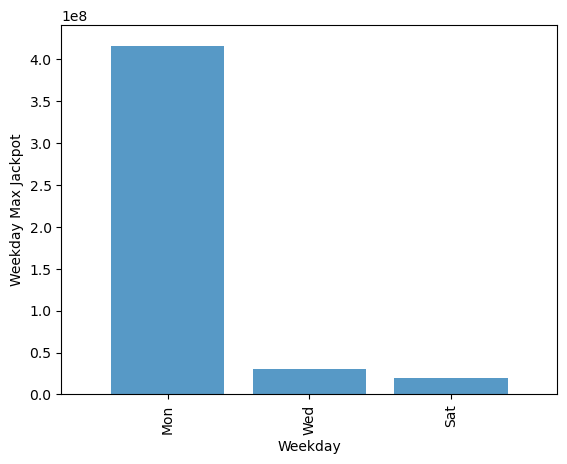

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot bar chart
Weekday = ["Mon", "Wed", "Sat"]
Jackpot  = [416000000, 30000000, 20000000]
x_axis = np.arange(0, len(Jackpot))
tick_locations = [x for x in x_axis]

# Use #1f77b4 for default blue to match bar chart above
plt.bar(x_axis, Jackpot, color="#1f77b4", alpha=0.75, align="center")

# Set the xlimit and ylimit 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Jackpot) + 25000000)

# Set the xlabel and ylabel 
plt.xlabel("Weekday")
plt.ylabel("Weekday Max Jackpot")

# Set tick location
plt.xticks(tick_locations, Weekday, rotation = 90)

plt.show()
plt.tight_layout()

In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++2022 DATA BEGINS BELOW THIS!+++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
# Evans code goes here :3                            \(*ˊᗜˋ*)/  

In [27]:
# ++++++++++++++++++++++++++++++++++++++++++++++QUESTIONS WITH COMBINED YEARS++++++++++++++++++++++++++++++++++++++++++++++++
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [39]:
# added column to 2021 so data will have a unique identifier
top_5_jackpot["Year"] = 2021 

# merge dataframes for years 2020, 2021, 2022.
merged_2020_2021_months_jackpot = pd.merge(top_months_jackpot, top_5_jackpot, on = 'Months')



# =============================================MERGE 2023 with merged_2020_2021_months_jackpot HERE :D

merged_2020_2021_months_jackpot

,Common Jackpot,Months,Year_x,Highest Jackpot Per Month,Year_y
0,394000000,January,2020,20000000,2021
1,363000000,December,2020,264000000,2021
2,216000000,November,2020,123000000,2021
3,190000000,April,2020,32000000,2021
4,169000000,August,2020,211000000,2021
5,160000000,March,2020,20000000,2021
6,135000000,June,2020,20000000,2021
7,127000000,October,2020,20000000,2021
8,126000000,July,2020,101000000,2021
9,125000000,May,2020,129000000,2021


In [74]:
# setting up 2020 dataframe to easily be merged to 2021
fixed_powerball_grouped_2020 = powerball_grouped_2020.reset_index()
fixed_powerball_grouped_2020 = fixed_powerball_grouped_2020.rename(columns = {'weekday' : 'Weekday'})

# added column to 2020 and 2021 so data will have a unique identifier
fixed_powerball_grouped_2020["Year"] = 2020
weekday_jackpot_max_df["Year"] = 2021 

# merge dataframes for years 2020, 2021, 2022.
merged_2020_2021_months_jackpot = pd.merge(fixed_powerball_grouped_2020, weekday_jackpot_max_df, on = 'Weekday')


merged_2020_2021_months_jackpot

,Weekday,jackpot,Year_x,Jackpot Weekday Max Value,Year_y
0,Sat,373000000,2020,30000000,2021
1,Wed,394000000,2020,20000000,2021
